In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [57]:
train = pd.read_csv("C:/Users/mncedisi.mncwabe/Documents/Practices/upvote_train.csv")
test = pd.read_csv("C:/Users/mncedisi.mncwabe/Documents/Practices/upvote_test.csv")

In [4]:
train.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [5]:
test.head()

,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0


In [6]:
train.shape

(330045, 7)

In [7]:
test.shape

(141448, 6)

In [8]:
train.isnull().sum()

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
Upvotes       0
dtype: int64

In [9]:
test.isnull().sum()

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
dtype: int64

In [11]:
train.describe()

,ID,Reputation,Answers,Username,Views,Upvotes
count,330045.000000,3.300450e+05,330045.000000,330045.000000,3.300450e+05,330045.000000
mean,235748.682789,7.773147e+03,3.917672,81442.888803,2.964507e+04,337.505358
std,136039.418471,2.706141e+04,3.579515,49215.100730,8.095646e+04,3592.441135
min,1.000000,0.000000e+00,0.000000,0.000000,9.000000e+00,0.000000
25%,117909.000000,2.820000e+02,2.000000,39808.000000,2.594000e+03,8.000000
50%,235699.000000,1.236000e+03,3.000000,79010.000000,8.954000e+03,28.000000
75%,353620.000000,5.118000e+03,5.000000,122559.000000,2.687000e+04,107.000000
max,471493.000000,1.042428e+06,76.000000,175738.000000,5.231058e+06,615278.000000


In [58]:
# drop username and ID from train and only username on test

train = train.drop(['Username','ID'],axis=1)
test = test.drop('Username',axis=1)

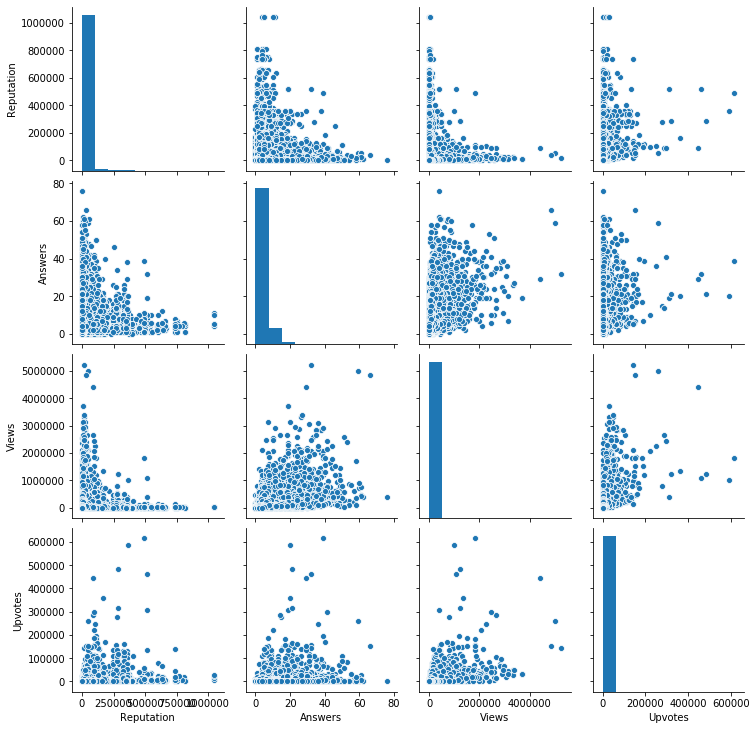

In [15]:
sns.pairplot(train)

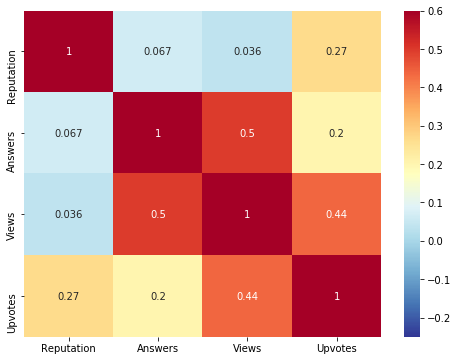

In [16]:
# check correlations among variables

plt.figure(figsize =(8,6))
sns.heatmap(train.corr(),cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)

In [23]:
# Clearly Views have significant correlation with Upvote count

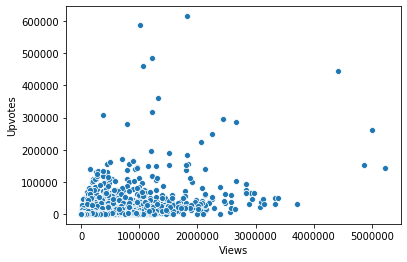

In [20]:
sns.scatterplot(x='Views',y='Upvotes',data=train)

In [24]:
# Scatterplot confirms the same thing

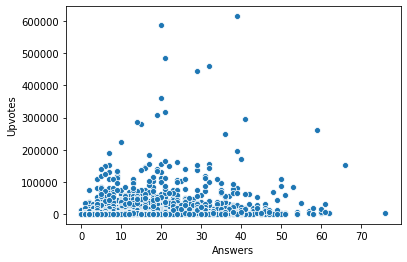

In [21]:
sns.scatterplot(x='Answers',y='Upvotes',data=train)

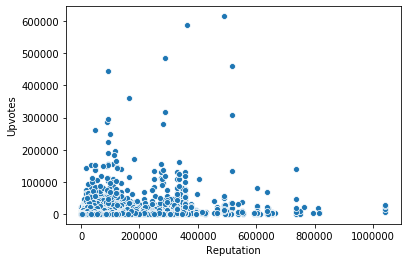

In [22]:
sns.scatterplot(x='Reputation',y='Upvotes',data=train)

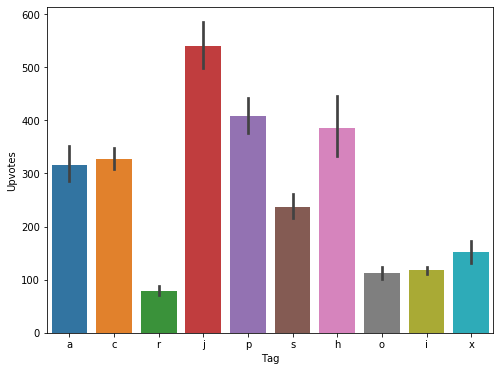

In [26]:
# check which tags have the most number of upvotes
plt.figure(figsize=(8,6))
sns.barplot(x='Tag',y='Upvotes',data = train)

In [28]:
# Tag j with highest numbe of Upvotes

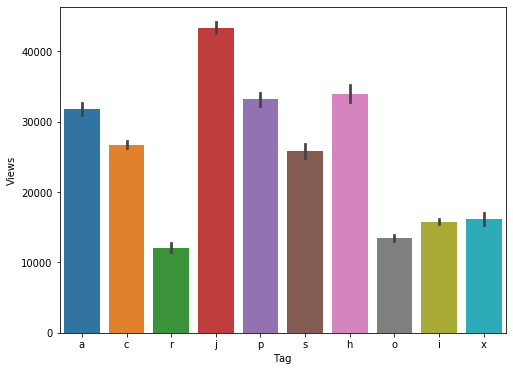

In [27]:
# Views according to Tags
plt.figure(figsize=(8,6))
sns.barplot(x='Tag',y='Views',data = train)

In [29]:
# Tag j with highest number of Views

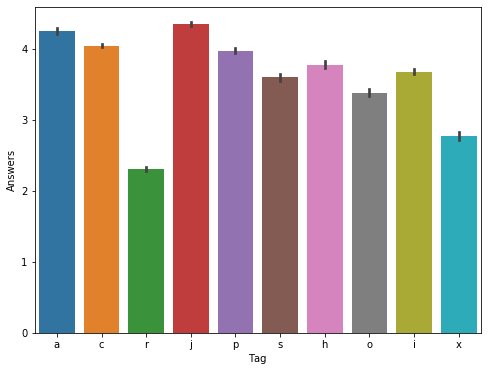

In [30]:
# Views according to Tags
plt.figure(figsize=(8,6))
sns.barplot(x='Tag',y='Answers',data = train)

In [31]:
# Tag j with highest number of Answers

In [59]:
# Let's create another variable "watched"
# which will indicate if the post will be viewed depending on the number of Answers

from sklearn.preprocessing import Binarizer

bn = Binarizer(threshold=4)
watched = bn.transform([train['Answers']])[0]
train['watched'] = watched 

In [60]:
watched = bn.transform([test['Answers']])[0]
test['watched'] = watched 

In [61]:
test.head()

,ID,Tag,Reputation,Answers,Views,watched
0,366953,a,5645.0,3.0,33200.0,0.0
1,71864,c,24511.0,6.0,2730.0,1.0
2,141692,i,927.0,1.0,21167.0,0.0
3,316833,i,21.0,6.0,18528.0,1.0
4,440445,i,4475.0,10.0,57240.0,1.0


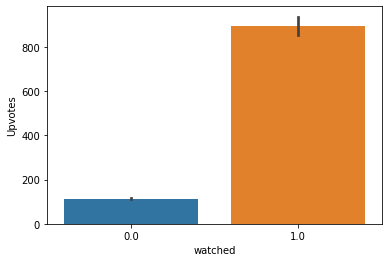

In [52]:
sns.barplot(x='watched',y='Upvotes',data = train)

In [62]:
# encode categorical variable 'Tag'

le = LabelEncoder()
train['Tag'] = le.fit_transform(train['Tag'])
test['Tag'] = le.fit_transform(test['Tag'])

In [65]:
test.head()

,ID,Tag,Reputation,Answers,Views,watched
0,366953,0,5645.0,3.0,33200.0,0.0
1,71864,1,24511.0,6.0,2730.0,1.0
2,141692,3,927.0,1.0,21167.0,0.0
3,316833,3,21.0,6.0,18528.0,1.0
4,440445,3,4475.0,10.0,57240.0,1.0


In [71]:
#----------------Now the data is ready to Train Machine Learning model-------------


from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import learning_curve,validation_curve,KFold
from xgboost import XGBRegressor,plot_importance
from sklearn.preprocessing import StandardScaler

In [126]:
pip install scikit-optimize

Note: you may need to restart the kernel to use updated packages.


In [127]:
from skopt import BayesSearchCV

In [66]:
X = train.drop('Upvotes',axis = 1)
y = train['Upvotes']

In [185]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [190]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [175]:
# Random forest regressor


rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf.score(X_test,y_test)*100

88.35869695626046

In [191]:
# XGB Regressor

xgb = XGBRegressor(learning_rate=0.1,alpha=0.05)
xgb.fit(X_train,y_train)
xgb.score(X_test,y_test)*100

89.65234834440852

In [199]:
y_pred = xgb.predict(X_test)

In [200]:
r2_score(y_test,y_pred)

0.8965234834440853

In [201]:
np.sqrt(mean_squared_error(y_test,y_pred))

1246.4780533294945

In [173]:
ID = pd.DataFrame(test.ID)

In [174]:
test = test.drop('ID',axis = 1)

In [197]:
test = sc.fit_transform(test)

In [202]:
y_final = xgb.predict(test)

#Submission
submission = pd.DataFrame({
        "ID": ID["ID"],
        "Upvotes": y_final
    })
submission.head()
submission.to_csv('Upvotes.csv', index=False)